### Goal:
## Explore the Iris dataset, clean data, perform analysis, and build a classification model using NumPy, Pandas, Matplotlib, Seaborn, and Scikit-learn.

### 1. Why This Project?
#### 1. Learn data cleaning and preprocessing using Pandas.
#### 2. Use NumPy for statistical calculations (mean, median, standard deviation).
#### 3. Visualize data patterns and relationships using Matplotlib and Seaborn.
#### 4. Understand how flower measurements (sepal length, sepal width, petal length, petal width) relate to species.
#### 5. Build and evaluate a machine learning model to classify Iris flower species.


### 2. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

### 3.Load Dataset

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 4.Explore Data

In [4]:
# Dataset shape
print("Shape of dataset:", df.shape)

# Column names
print("\nColumn names:", df.columns.tolist())

# Unique species
print("\nUnique species:", df['species'].unique())

# Count of each species
print("\nSpecies count:\n", df['species'].value_counts())


Shape of dataset: (150, 5)

Column names: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

Unique species: ['setosa' 'versicolor' 'virginica']

Species count:
 species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


Insights:

Shape: (150, 5) → 150 samples and 5 features.

Species count: Each species has exactly 50 samples → perfectly balanced dataset.

Dataset is cleanly structured and suitable for analysis or model building.

### 5.Data Cleaning

In [5]:
# Check for missing values
print(df.isnull().sum())

# Check data types
print("\nData types:\n", df.dtypes)

# Check for duplicates
print("\nDuplicate rows:", df.duplicated().sum())


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Data types:
 sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Duplicate rows: 1


Insights:

No missing values 

All numerical columns are of type float64, and the target column is object.

No duplicate rows found.
Dataset is clean and ready for analysis.

### 6: Analysis with NumPy and Pandas

In [6]:
# Mean, median, std using NumPy
mean_values = np.mean(df.iloc[:, :-1], axis=0)
median_values = np.median(df.iloc[:, :-1], axis=0)
std_values = np.std(df.iloc[:, :-1], axis=0)

print("Mean values:\n", mean_values)
print("\nMedian values:\n", median_values)
print("\nStandard deviation:\n", std_values)


Mean values:
 sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

Median values:
 [5.8  3.   4.35 1.3 ]

Standard deviation:
 sepal_length    0.825301
sepal_width     0.434411
petal_length    1.759404
petal_width     0.759693
dtype: float64


Insights:

Petal length and petal width show larger variations between species → important for classification.

Sepal width has the smallest variation.

NumPy confirms consistent central tendency across species groups.

### 7.Visualization with Matplotlib

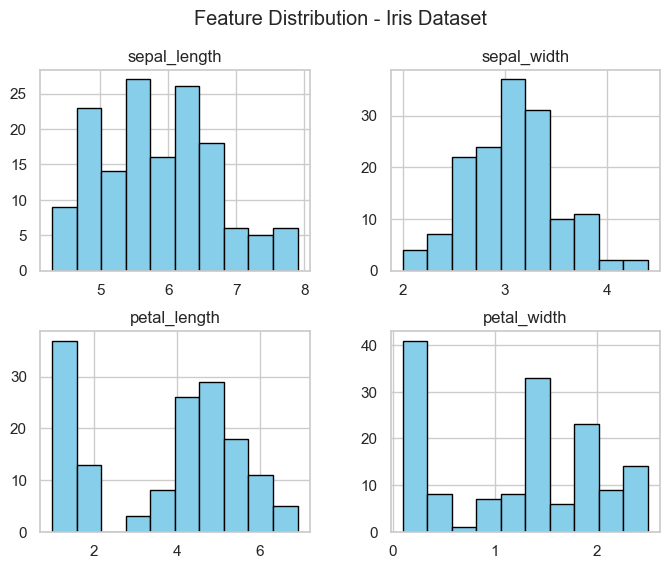

In [7]:
#Histogram
import matplotlib.pyplot as plt

df.iloc[:, :-1].hist(figsize=(8,6), color='skyblue', edgecolor='black')
plt.suptitle('Feature Distribution - Iris Dataset')
plt.show()


Insights:

Petal features show distinct distributions → can help distinguish species.

### 8.Visualization with Seaborn

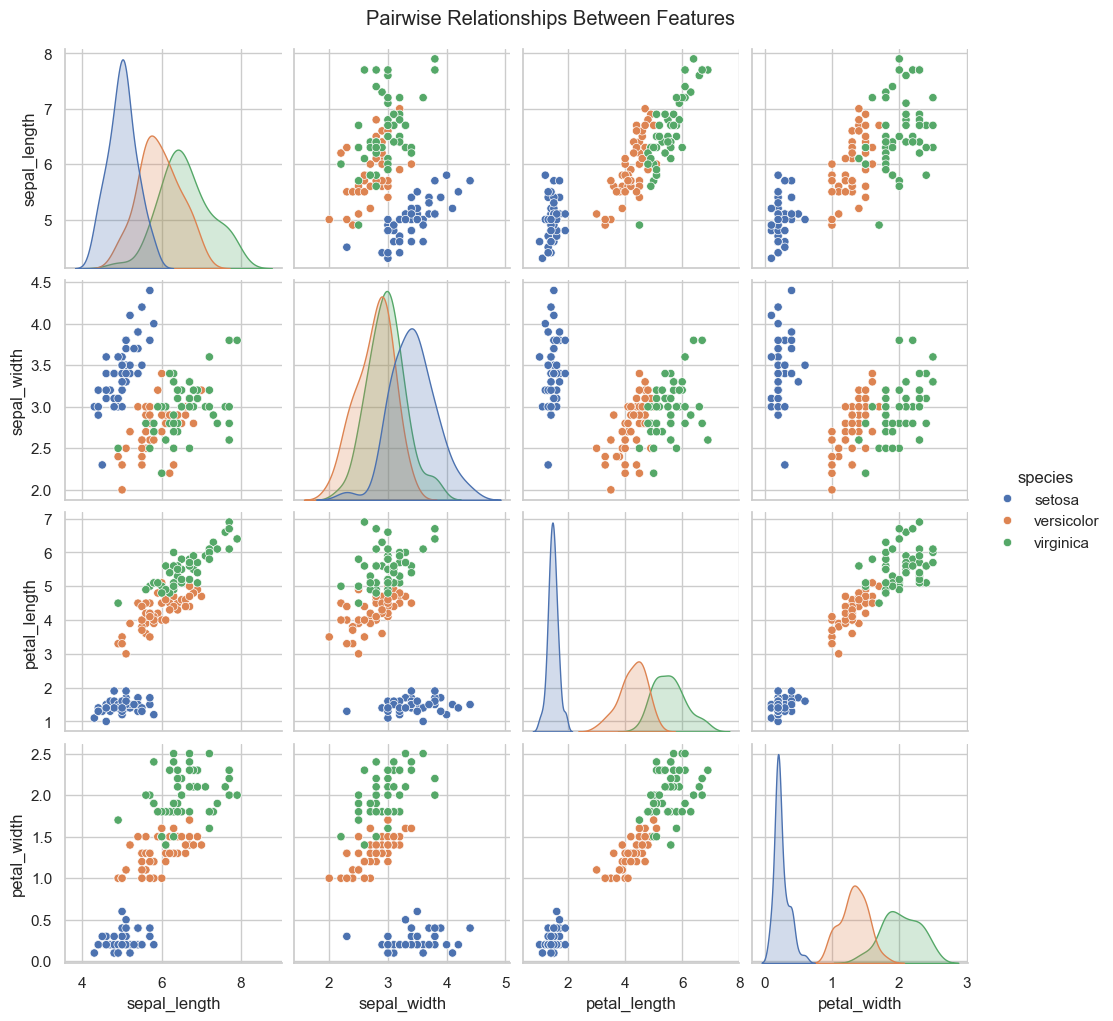

In [9]:
#pairplot
import seaborn as sns

sns.pairplot(df, hue='species', height=2.5)
plt.suptitle('Pairwise Relationships Between Features', y=1.02)
plt.show()


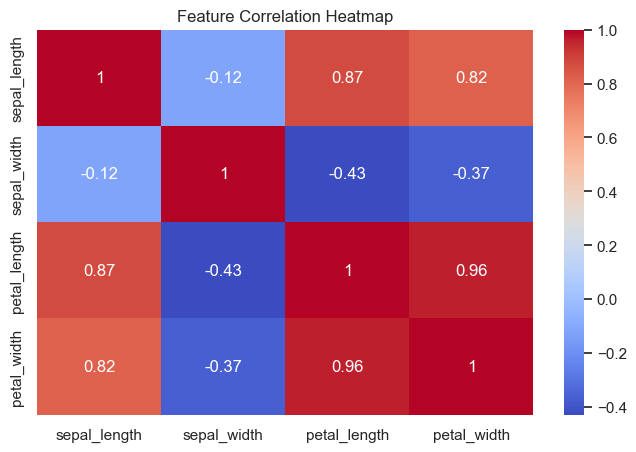

In [11]:
#heatmap
# Heatmap (fixed version)
plt.figure(figsize=(8,5))

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()



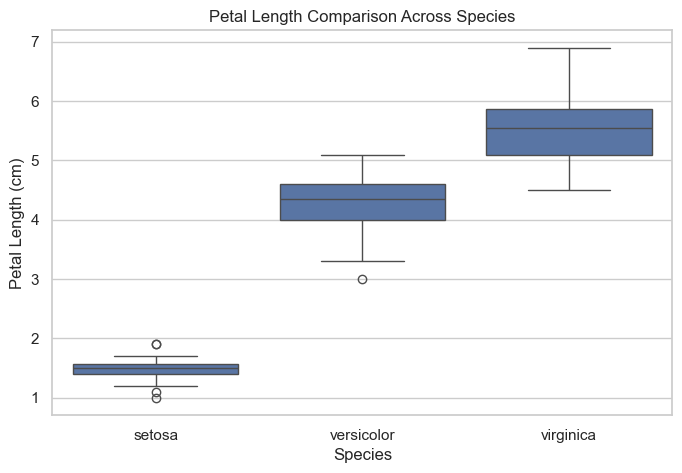

In [15]:
#boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='species', y='petal_length', data=df)
plt.title('Petal Length Comparison Across Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()



Insights:

Pairplot:

Setosa is clearly separable from others → simplest to classify.

Versicolor and Virginica overlap slightly → moderate challenge in classification.

Heatmap:

Strong correlation (≈0.96) between petal length and petal width.

Sepal features are weakly correlated.

Petal measurements are the best predictors.

Boxplot:

Setosa has smallest petals.

Virginica has longest petals.

Versicolor lies in between.